## **Q1**

In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


In [15]:
data=pd.read_csv('/content/advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91        89
           1       0.91      0.96      0.93       111

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



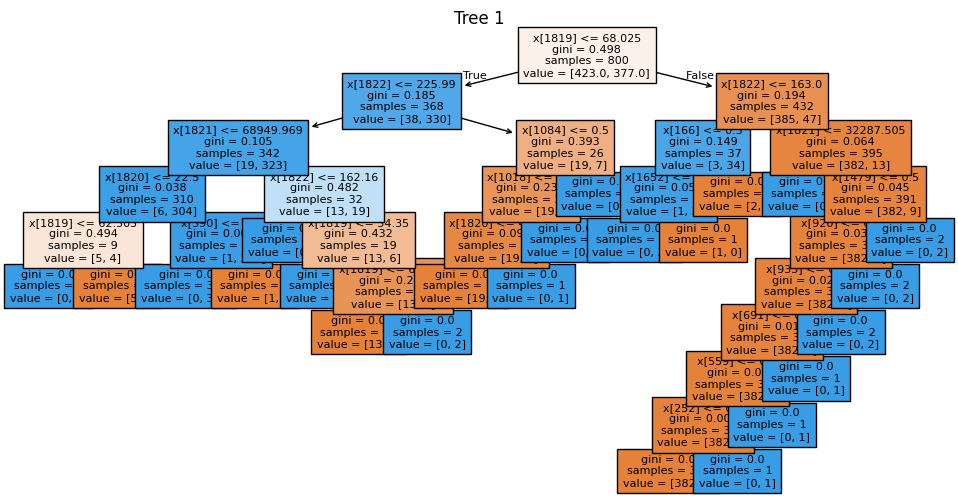

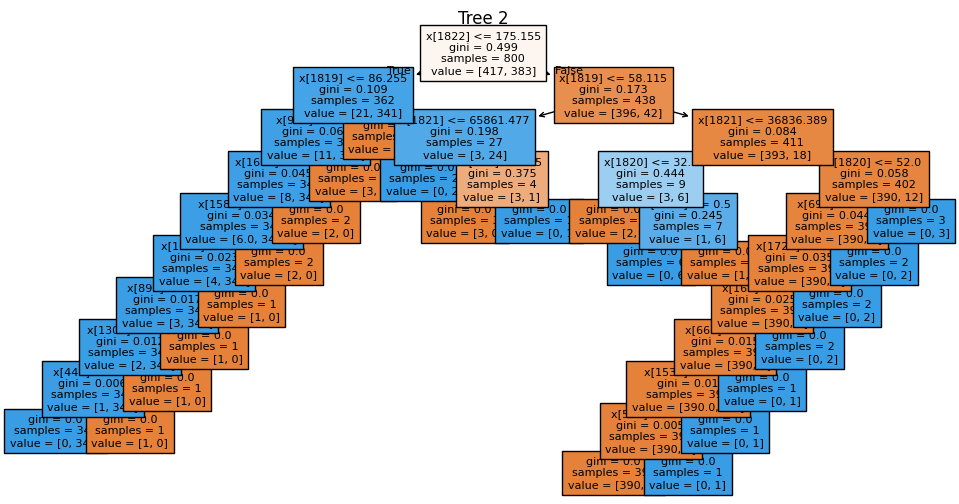

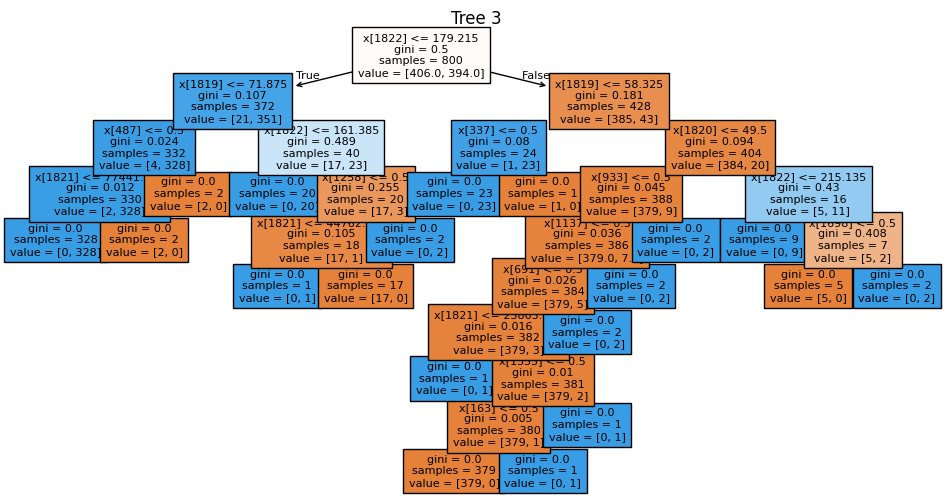

In [16]:
X = data.drop(columns=['Clicked on Ad', 'Timestamp'])
y = data['Clicked on Ad']

categorical_cols = ['Ad Topic Line', 'City', 'Country']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numerical_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Random Forest from scratch (with sklearn DecisionTree)
class RandomForest:
    def __init__(self, n_estimators=3):
        self.n_estimators = n_estimators
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sample = X[indices]
            y_sample = y.iloc[indices]
            clf = DecisionTreeClassifier()
            clf.fit(X_sample, y_sample)
            self.trees.append(clf)

    def predict(self, X):
        preds = np.array([tree.predict(X) for tree in self.trees])
        return np.round(preds.mean(axis=0)).astype(int)

    def plot_trees(self):
        for i, tree_model in enumerate(self.trees):
            plt.figure(figsize=(12, 6))
            plot_tree(tree_model, filled=True, fontsize=8)
            plt.title(f"Tree {i+1}")
            plt.show()

# Train and evaluate
forest = RandomForest(n_estimators=3)
forest.fit(X_train_processed, y_train)
y_pred = forest.predict(X_test_processed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot individual decision trees
forest.plot_trees()

## **Q2**

===== Experiment 1: n_estimators=5, max_depth=None =====
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



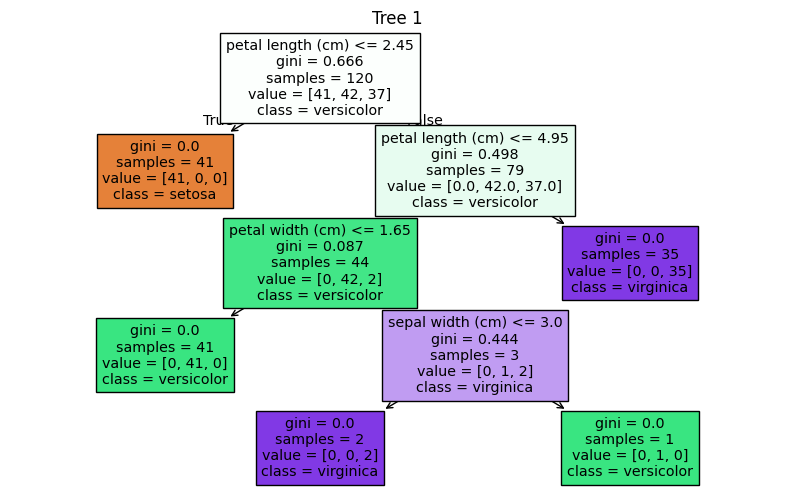

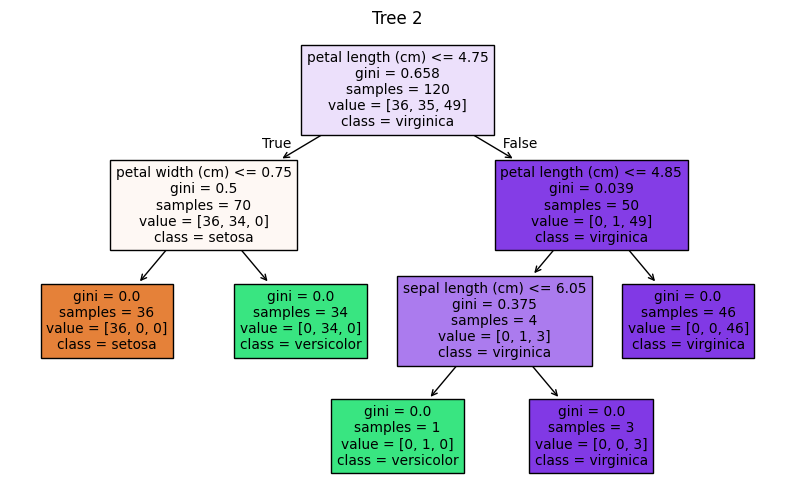

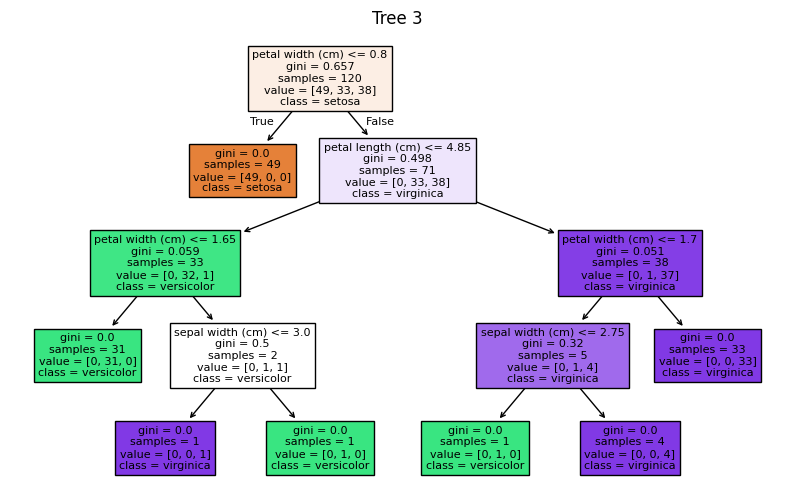

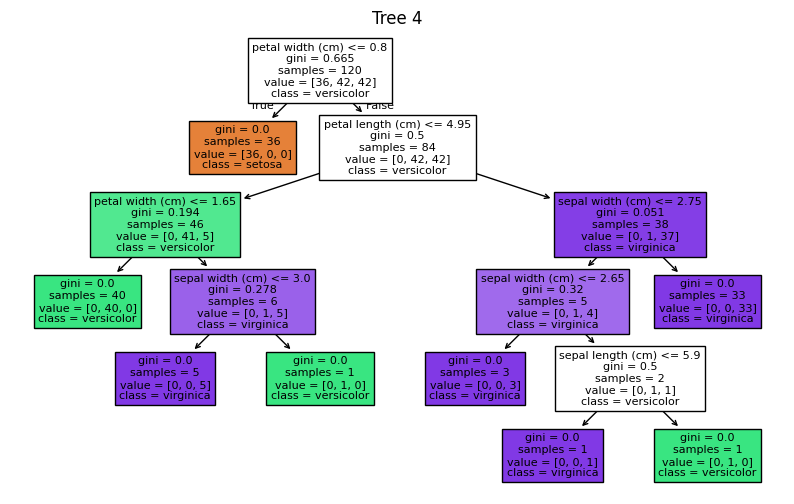

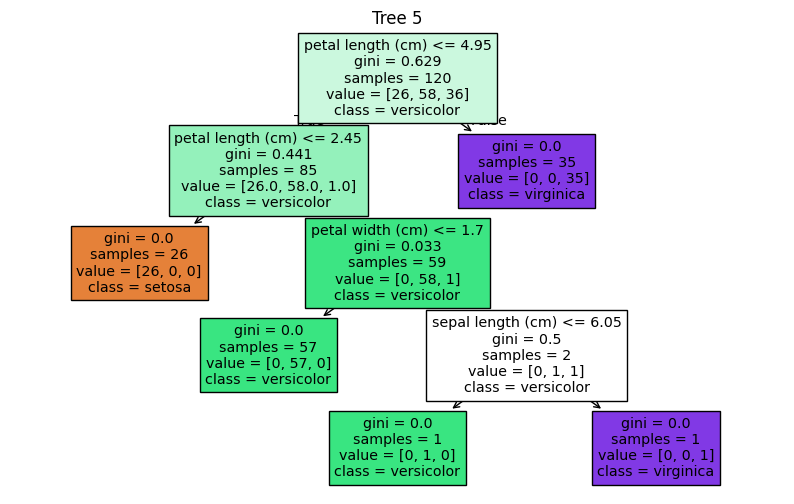


===== Experiment 2: n_estimators=3, max_depth=2 =====
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



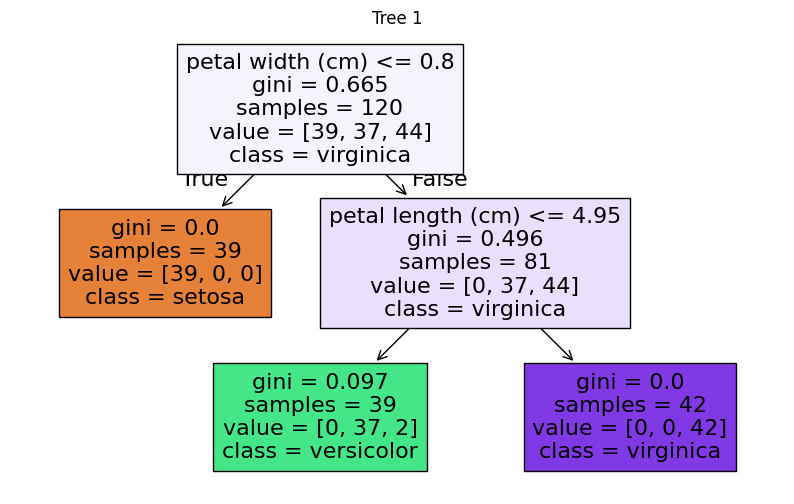

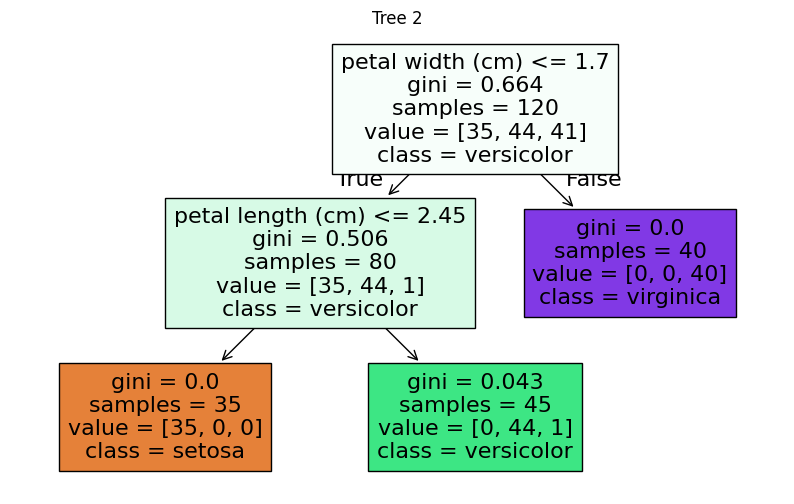

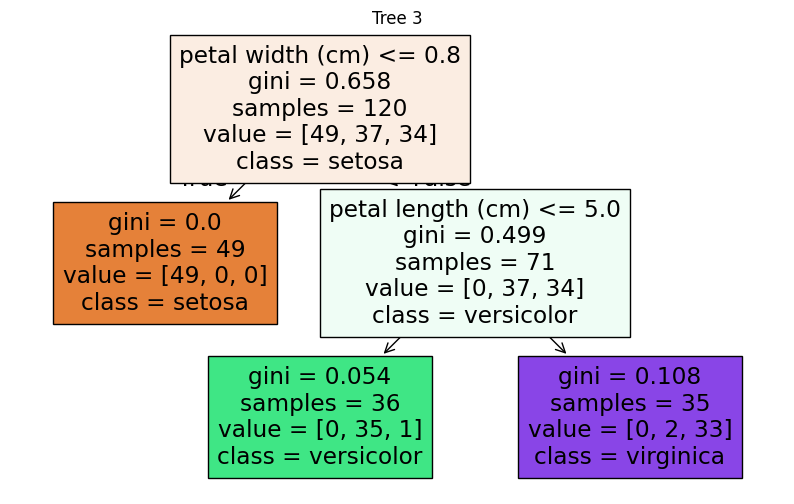

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

class RandomForest:
    def __init__(self, n_estimators=5, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sample = X[indices]
            y_sample = y[indices]
            clf = DecisionTreeClassifier(max_depth=self.max_depth)
            clf.fit(X_sample, y_sample)
            self.trees.append(clf)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        final_preds = []
        for i in range(X.shape[0]):
            counts = np.bincount(predictions[:, i])
            final_preds.append(np.argmax(counts))
        return np.array(final_preds)

    def plot_trees(self):
        for i, tree_model in enumerate(self.trees):
            plt.figure(figsize=(10, 6))
            plot_tree(tree_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
            plt.title(f"Tree {i+1}")
            plt.show()

print("===== Experiment 1: n_estimators=5, max_depth=None =====")
rf1 = RandomForest(n_estimators=5, max_depth=None)
rf1.fit(X_train, y_train)
y_pred1 = rf1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))
rf1.plot_trees()

print("\n===== Experiment 2: n_estimators=3, max_depth=2 =====")
rf2 = RandomForest(n_estimators=3, max_depth=2)
rf2.fit(X_train, y_train)
y_pred2 = rf2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
rf2.plot_trees()
